# Bavarian load timeseries generation

The load timeseries is downloaded from the [Open Power System Data Platform](https://data.open-power-system-data.org/time_series/), which is extracted from the ENTSO-E Transparency Platform.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib notebook

In [11]:
# Year
year = '2015'

# Path for the data
folder = 'Daten'
name = 'OPSD-DE-2015-time_series_60min_DE_tennet'
data_type = '.csv'
path = os.path.join(folder, name+data_type)

<IPython.core.display.Javascript object>


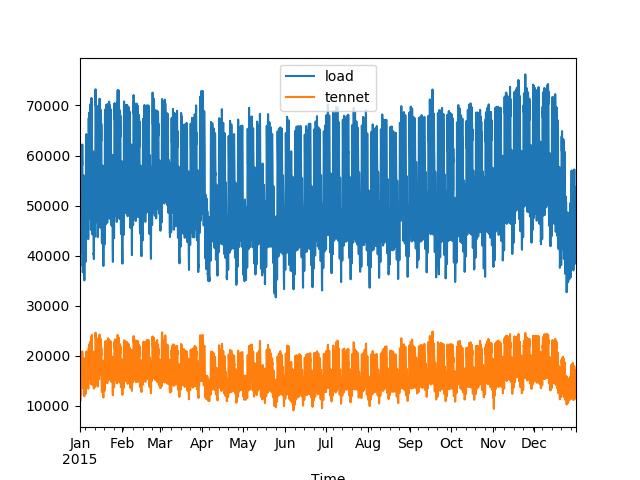

In [12]:
loadseries = pd.read_csv(path, sep=',', usecols=[0,3,5], index_col=0, parse_dates=[0], decimal='.',
                names=['Time', 'load', 'tennet'], skiprows=1)
loadseries.plot()

## Consumption in the administrative regions
The following data is taken from the [Energieatlas Bayern](https://www.energieatlas.bayern.de/) (Bavarian Ministry for economics) and licensed via [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)

In [13]:
# Extract summed yearly produced energy in administrative regions in Bavaria
sheet = 'Wasserkraft - Gesamtstromverbrauch RB Bayern'
path_sheet = os.path.join(folder, sheet+data_type)

loadsum = pd.read_csv(path_sheet, usecols=[0,5], names=['RB', 'load'], sep=',', index_col=0, skiprows=1)
loadsum = loadsum.T
loadsum

RB,Oberbayern,Niederbayern,Oberpfalz,Oberfranken,Mittelfranken,Unterfranken,Schwaben
load,32325007.0,9376639.0,7223220.0,6693871.0,10447402.0,8781307.0,13231612.0


In [14]:
(91598228.93-loadsum.sum(axis=1))/loadsum.sum(axis=1)

load    0.039955
dtype: float64

In [15]:
load = pd.DataFrame()
for lv in loadsum:
    help_df = loadseries.tennet/loadseries.tennet.sum()*loadsum[lv].values[0]*0.95
    help_df = help_df.rename(lv)
    
    load = pd.concat([load,help_df], axis=1)

<IPython.core.display.Javascript object>


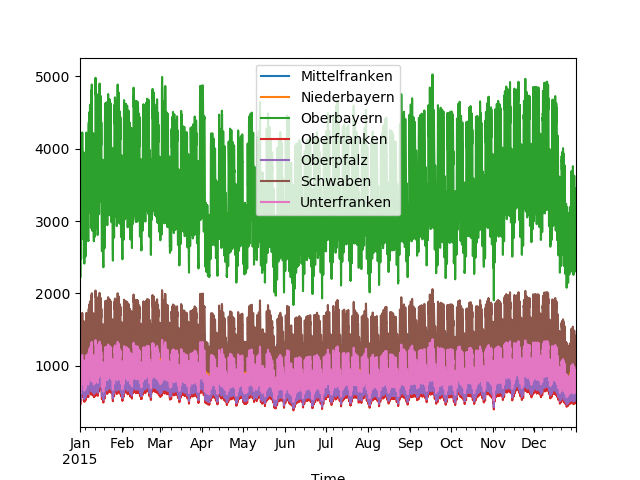

In [16]:
load = load.sort_index(axis=1)
load.plot()

In [17]:
sum(load.sum())

83675105.100000054

In [18]:
load.to_excel('Loadtimeseries Tn-wl5'+year+'.xlsx')